In [ ]:
# !pip install segmentation-models

In [1]:
# from unet import simple_unet_model
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff

import tensorflow as tf
import pandas as pd
import glob
from sklearn.model_selection import train_test_split

In [2]:
IMG_HEIGHT = 512
IMG_WIDTH = 512
IMG_CHANNELS = 3

In [3]:
import cv2

# Define the desired shape
def img_read(path):
    desired_shape = (IMG_WIDTH, IMG_HEIGHT)

    # Load the image
    image = cv2.imread(path,)
    img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 
    # Resize the image to the desired shape
    desired_size = (IMG_WIDTH, IMG_HEIGHT)



    # Convert the image to a numpy array for further processing
    return cv2.resize(img,desired_shape, interpolation=cv2.INTER_AREA)
def msk_read(path):
    img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
    desired_size = (IMG_WIDTH, IMG_HEIGHT)
 
    resized_image = cv2.resize(img, desired_size, interpolation=cv2.INTER_AREA)

    # Convert the image to a numpy array for further processing
    return resized_image

In [4]:
large_image_stack = []
large_mask_stack = []
import os
mask_file_names=os.listdir("Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\mask_aug\\")
X=[]
y=[]

for i in mask_file_names:
    try:
        p=os.path.join("Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\img_aug\\",i)
        X.append(os.path.join("Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\img_aug\\",i))
        y.append(os.path.join("Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\mask_aug\\",i))
        
        
    except:
        print(f'{i} does not exist in image')



for file_path in X:   
    #print('0')
    signal = img_read(file_path)/255.
    
    large_image_stack.append(signal)


for file_path in y:   
    #print('1')
    signal = msk_read(file_path)/255.
    large_mask_stack.append(signal)
   


In [5]:
large_image_stack=np.array(large_image_stack)
large_mask_stack=np.array(large_mask_stack)
large_mask_stack=np.expand_dims(large_mask_stack, -1)

In [6]:
# all_img_patches = []
# for img in range(large_image_stack.shape[0]):
#     #print(img)     #just stop here to see all file names printed
     
#     large_image = large_image_stack[img]
    
#     patches_img = patchify(large_image, (512, 512,3), step=256)  #Step=256 for 256 patches means no overlap
#     patches_img=np.squeeze(patches_img)

#     for i in range(patches_img.shape[0]):
#         for j in range(patches_img.shape[1]):
            
#             single_patch_img = patches_img[i,j,:,:]
# #             single_patch_img = single_patch_img / 255.
            
#             all_img_patches.append(single_patch_img)

In [7]:
large_image_stack.shape

(1480, 512, 512, 3)

In [8]:
# all_img_patches=np.array(all_img_patches)
# all_mask_patches=np.array(all_mask_patches)
# all_mask_patches=np.expand_dims(all_mask_patches,-1)

In [9]:
large_image_stack.shape, large_mask_stack.shape

((1480, 512, 512, 3), (1480, 512, 512, 1))

In [10]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [11]:
BACKBONE='resnet34'
preprocess_input1=sm.get_preprocessing(BACKBONE)


In [12]:
images1=preprocess_input1(large_image_stack)

In [13]:
X_train, X_test, y_train, y_test=train_test_split(images1,large_mask_stack,random_state=42, test_size=0.25)

In [14]:
X_train_g=X_train #[:,:,:,1]
X_test_g=X_test
# X_test_g=np.expand_dims(X_test[:,:,:,1],-1)

In [15]:
# X_train_g=np.zeros_like(X_train)
# X_train_g[:,:, :, 1]=X_train[:,:, :, 1]
# X_test_g=np.zeros_like(X_test)

# X_train_g[:,:, :, 1]=X_train[:,:, :, 1]
# X_test_g[:,:, :, 1]=X_test[:,:, :, 1]

In [16]:
X_train_g.shape,y_train.shape,X_test_g.shape,y_test.shape

((1110, 512, 512, 3),
 (1110, 512, 512, 1),
 (370, 512, 512, 3),
 (370, 512, 512, 1))

In [28]:
np.save('X_train_g',X_train_g)
np.save('y_train',y_train)
np.save('X_test_g',X_test_g)
np.save('y_test',y_test)

In [18]:
import random
import numpy as np

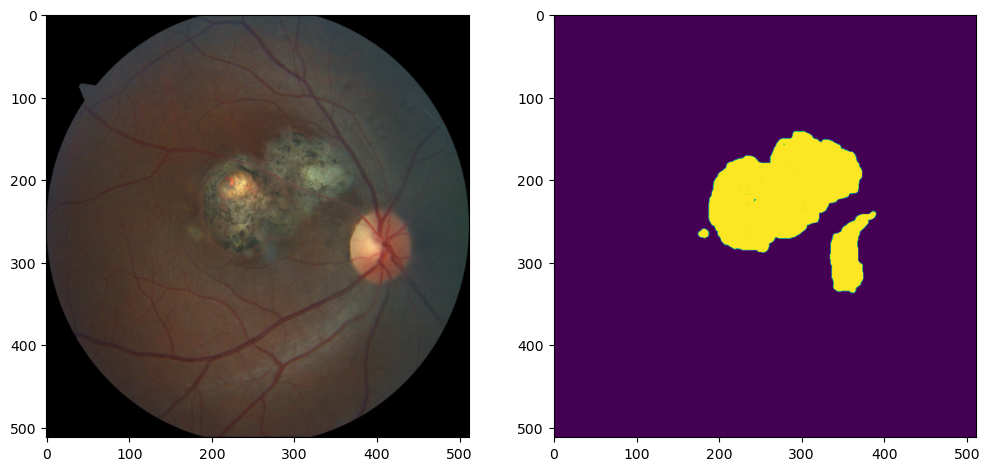

In [19]:
rng=random.randint(0,X_train_g.shape[0])
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(X_train_g[rng],cmap='gray')
plt.subplot(122)
plt.imshow(y_train[rng]);

In [20]:
seed=24
from keras.preprocessing.image import ImageDataGenerator


# img_data_gen_args=dict(
#                       rotation_range=90,

# #                       shear_range=0.5,
#                       zoom_range=0.3,
#                       horizontal_flip=True,
#                       vertical_flip=True,
# #                       fill_mode='reflect'
#                       )


# mask_data_gen_args=dict(
#                       rotation_range=90,
#                       width_shift_range=0.3,
#                       height_shift_range=0.3,
# #                       shear_range=0.5,
#                       zoom_range=0.3,
#                       horizontal_flip=True,
#                       vertical_flip=True,
# #                       fill_mode='reflect',
#                        preprocessing_function=lambda x:np.where(x>0,1,0).astype(x.dtype))

In [21]:
image_data_generator=ImageDataGenerator()
image_data_generator.fit(X_train,augment=False,seed=seed)

image_generator=image_data_generator.flow(X_train_g,seed=seed)
valid_img_generator=image_data_generator.flow(X_test,seed=seed)

In [22]:
mask_data_generator=ImageDataGenerator()
mask_data_generator.fit(y_train,augment=False,seed=seed)

mask_generator=mask_data_generator.flow(y_train,seed=seed)
valid_mask_generator=mask_data_generator.flow(y_test,seed=seed)

In [23]:
def my_image_generator(image_generator, mask_generator):
    train_generator=zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        yield (img, mask)

In [24]:
my_generator=my_image_generator(image_generator, mask_generator)

validation_datagen=my_image_generator(valid_img_generator, valid_mask_generator)

(512, 512, 3)


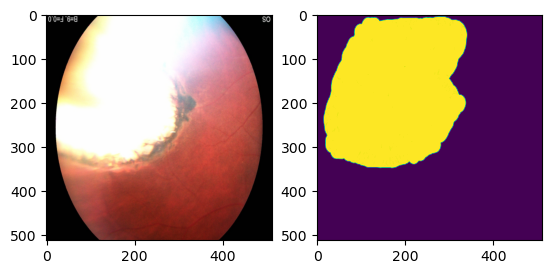

In [25]:
x=image_generator.next()
y=mask_generator.next()

for i in range(0,1):
    image=x[i]
    mask=y[i]
    print(image.shape)
    plt.subplot(121)
    plt.imshow(image)
    plt.subplot(122)
    plt.imshow(mask)

In [26]:
model=sm.Unet('vgg16',encoder_weights='imagenet')

model.compile('Adam',loss=sm.losses.bce_jaccard_loss,metrics=[sm.metrics.iou_score,sm.losses.bce_dice_loss])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 block1_conv1 (Conv2D)          (None, None, None,   1792        ['input_1[0][0]']                
                                64)                                                               
                                                                                                  
 block1_conv2 (Conv2D)          (None, None, None,   36928       ['block1_conv1[0][0]']           
                                64)                                                           

                                                                  'block5_conv3[0][0]']           
                                                                                                  
 decoder_stage0a_conv (Conv2D)  (None, None, None,   2359296     ['decoder_stage0_concat[0][0]']  
                                256)                                                              
                                                                                                  
 decoder_stage0a_bn (BatchNorma  (None, None, None,   1024       ['decoder_stage0a_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 decoder_stage0a_relu (Activati  (None, None, None,   0          ['decoder_stage0a_bn[0][0]']     
 on)                            256)                                                              
          

 decoder_stage3a_relu (Activati  (None, None, None,   0          ['decoder_stage3a_bn[0][0]']     
 on)                            32)                                                               
                                                                                                  
 decoder_stage3b_conv (Conv2D)  (None, None, None,   9216        ['decoder_stage3a_relu[0][0]']   
                                32)                                                               
                                                                                                  
 decoder_stage3b_bn (BatchNorma  (None, None, None,   128        ['decoder_stage3b_conv[0][0]']   
 lization)                      32)                                                               
                                                                                                  
 decoder_stage3b_relu (Activati  (None, None, None,   0          ['decoder_stage3b_bn[0][0]']     
 on)      

In [27]:
callbacks = [
#     tf.keras.callbacks.EarlyStopping(patience=5, verbose=1),
#     tf.keras.callbacks.ReduceLROnPlateau(patience=3, verbose=1),
    tf.keras.callbacks.ModelCheckpoint('Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\working\\model_Xfer_vgg16_jaccard_loss.h5', verbose=1, save_best_only=True, save_weights_only=False)
]
history=model.fit(my_generator,validation_data=validation_datagen,steps_per_epoch=50,validation_steps=50, epochs=100,callbacks=callbacks)

Epoch 1/100
50/50 [==============================] - ETA: 0s - loss: 1.1615 - iou_score: 0.1677 - binary_crossentropy_plus_dice_loss: 1.0475
Epoch 1: val_loss improved from inf to 49.84002, saving model to Ocular_Toxoplasmosis_Data_V3\segmentation_task\working\model_Xfer_vgg16_jaccard_loss.h5
50/50 [==============================] - 124s 2s/step - loss: 1.1615 - iou_score: 0.1677 - binary_crossentropy_plus_dice_loss: 1.0475 - val_loss: 49.8400 - val_iou_score: 0.0758 - val_binary_crossentropy_plus_dice_loss: 49.8741
Epoch 2/100
50/50 [==============================] - ETA: 0s - loss: 0.7756 - iou_score: 0.3716 - binary_crossentropy_plus_dice_loss: 0.6087
Epoch 2: val_loss improved from 49.84002 to 5.27638, saving model to Ocular_Toxoplasmosis_Data_V3\segmentation_task\working\model_Xfer_vgg16_jaccard_loss.h5
50/50 [==============================] - 81s 2s/step - loss: 0.7756 - iou_score: 0.3716 - binary_crossentropy_plus_dice_loss: 0.6087 - val_loss: 5.2764 - val_iou_score: 0.1430 - va

Epoch 19/100
50/50 [==============================] - ETA: 0s - loss: 0.4719 - iou_score: 0.6321 - binary_crossentropy_plus_dice_loss: 0.3306
Epoch 19: val_loss did not improve from 0.53254
50/50 [==============================] - 78s 2s/step - loss: 0.4719 - iou_score: 0.6321 - binary_crossentropy_plus_dice_loss: 0.3306 - val_loss: 0.6394 - val_iou_score: 0.5350 - val_binary_crossentropy_plus_dice_loss: 0.4780
Epoch 20/100
50/50 [==============================] - ETA: 0s - loss: 0.4678 - iou_score: 0.6330 - binary_crossentropy_plus_dice_loss: 0.3268
Epoch 20: val_loss did not improve from 0.53254
50/50 [==============================] - 78s 2s/step - loss: 0.4678 - iou_score: 0.6330 - binary_crossentropy_plus_dice_loss: 0.3268 - val_loss: 0.5508 - val_iou_score: 0.5979 - val_binary_crossentropy_plus_dice_loss: 0.4010
Epoch 21/100
50/50 [==============================] - ETA: 0s - loss: 0.4522 - iou_score: 0.6466 - binary_crossentropy_plus_dice_loss: 0.3139
Epoch 21: val_loss improved 

50/50 [==============================] - 84s 2s/step - loss: 0.3238 - iou_score: 0.7459 - binary_crossentropy_plus_dice_loss: 0.2155 - val_loss: 0.3774 - val_iou_score: 0.7206 - val_binary_crossentropy_plus_dice_loss: 0.2620
Epoch 38/100
50/50 [==============================] - ETA: 0s - loss: 0.3109 - iou_score: 0.7553 - binary_crossentropy_plus_dice_loss: 0.2060
Epoch 38: val_loss did not improve from 0.37735
50/50 [==============================] - 85s 2s/step - loss: 0.3109 - iou_score: 0.7553 - binary_crossentropy_plus_dice_loss: 0.2060 - val_loss: 0.6297 - val_iou_score: 0.5802 - val_binary_crossentropy_plus_dice_loss: 0.4751
Epoch 39/100
50/50 [==============================] - ETA: 0s - loss: 0.2979 - iou_score: 0.7670 - binary_crossentropy_plus_dice_loss: 0.1970
Epoch 39: val_loss did not improve from 0.37735
50/50 [==============================] - 84s 2s/step - loss: 0.2979 - iou_score: 0.7670 - binary_crossentropy_plus_dice_loss: 0.1970 - val_loss: 0.4051 - val_iou_score: 0

Epoch 56/100
50/50 [==============================] - ETA: 0s - loss: 0.3252 - iou_score: 0.7427 - binary_crossentropy_plus_dice_loss: 0.2160
Epoch 56: val_loss did not improve from 0.33175
50/50 [==============================] - 82s 2s/step - loss: 0.3252 - iou_score: 0.7427 - binary_crossentropy_plus_dice_loss: 0.2160 - val_loss: 0.4002 - val_iou_score: 0.7079 - val_binary_crossentropy_plus_dice_loss: 0.2846
Epoch 57/100
50/50 [==============================] - ETA: 0s - loss: 0.2677 - iou_score: 0.7889 - binary_crossentropy_plus_dice_loss: 0.1749
Epoch 57: val_loss did not improve from 0.33175
50/50 [==============================] - 81s 2s/step - loss: 0.2677 - iou_score: 0.7889 - binary_crossentropy_plus_dice_loss: 0.1749 - val_loss: 0.3472 - val_iou_score: 0.7434 - val_binary_crossentropy_plus_dice_loss: 0.2397
Epoch 58/100
50/50 [==============================] - ETA: 0s - loss: 0.2272 - iou_score: 0.8196 - binary_crossentropy_plus_dice_loss: 0.1460
Epoch 58: val_loss did not i

Epoch 74/100
50/50 [==============================] - ETA: 0s - loss: 0.1052 - iou_score: 0.9154 - binary_crossentropy_plus_dice_loss: 0.0648
Epoch 74: val_loss improved from 0.27130 to 0.26958, saving model to Ocular_Toxoplasmosis_Data_V3\segmentation_task\working\model_Xfer_vgg16_jaccard_loss.h5
50/50 [==============================] - 80s 2s/step - loss: 0.1052 - iou_score: 0.9154 - binary_crossentropy_plus_dice_loss: 0.0648 - val_loss: 0.2696 - val_iou_score: 0.8106 - val_binary_crossentropy_plus_dice_loss: 0.1842
Epoch 75/100
50/50 [==============================] - ETA: 0s - loss: 0.1039 - iou_score: 0.9166 - binary_crossentropy_plus_dice_loss: 0.0640
Epoch 75: val_loss did not improve from 0.26958
50/50 [==============================] - 77s 2s/step - loss: 0.1039 - iou_score: 0.9166 - binary_crossentropy_plus_dice_loss: 0.0640 - val_loss: 0.2793 - val_iou_score: 0.8065 - val_binary_crossentropy_plus_dice_loss: 0.1943
Epoch 76/100
50/50 [==============================] - ETA: 0s

Epoch 93/100
50/50 [==============================] - ETA: 0s - loss: 0.0626 - iou_score: 0.9494 - binary_crossentropy_plus_dice_loss: 0.0379
Epoch 93: val_loss did not improve from 0.26288
50/50 [==============================] - 78s 2s/step - loss: 0.0626 - iou_score: 0.9494 - binary_crossentropy_plus_dice_loss: 0.0379 - val_loss: 0.2648 - val_iou_score: 0.8249 - val_binary_crossentropy_plus_dice_loss: 0.1883
Epoch 94/100
50/50 [==============================] - ETA: 0s - loss: 0.0613 - iou_score: 0.9502 - binary_crossentropy_plus_dice_loss: 0.0371
Epoch 94: val_loss did not improve from 0.26288
50/50 [==============================] - 78s 2s/step - loss: 0.0613 - iou_score: 0.9502 - binary_crossentropy_plus_dice_loss: 0.0371 - val_loss: 0.2649 - val_iou_score: 0.8260 - val_binary_crossentropy_plus_dice_loss: 0.1852
Epoch 95/100
50/50 [==============================] - ETA: 0s - loss: 0.0611 - iou_score: 0.9507 - binary_crossentropy_plus_dice_loss: 0.0370
Epoch 95: val_loss did not i

In [29]:
model=tf.keras.models.load_model('Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\working\\model_Xfer_vgg16_jaccard_loss.h5',compile=False)

In [30]:
y_pred=model.predict(X_test)

12/12 [==============================] - 4s 327ms/step


In [31]:
y_pred_thresh=y_pred>0.5
intersection=np.logical_and(y_test,y_pred_thresh)
union=np.logical_or(y_test,y_pred_thresh)
iou=np.sum(intersection)/np.sum(union)
iou

0.8132586501539394

1/1 [==============================] - 1s 1s/step


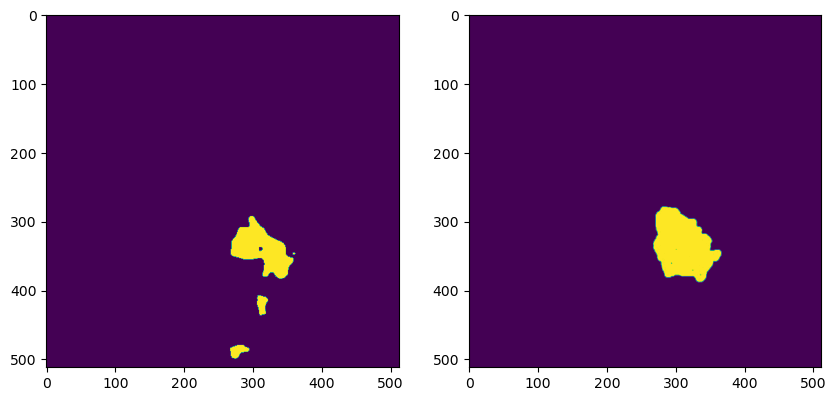

In [32]:
test_img_num=random.randint(0,len(X_test)-1)
test_img=X_test[test_img_num]
test_img_input=np.expand_dims(test_img,0)
gt=y_test[test_img_num]
yp=model.predict(test_img_input)

plt.figure(figsize=(10,7))
plt.subplot(121)
plt.imshow(yp[0,:,:,0]>.5)
plt.subplot(122)
plt.imshow(gt[:,:,0])


In [33]:
his_df=pd.DataFrame(history.history)
his_df.to_csv('Ocular_Toxoplasmosis_Data_V3\\segmentation_task\\working\\his_vgg_res_jaccard.csv')

In [34]:
desired_value_rows = his_df[his_df['val_loss'] == 0.179069]
desired_value_rows

,loss,iou_score,binary_crossentropy_plus_dice_loss,val_loss,val_iou_score,val_binary_crossentropy_plus_dice_loss


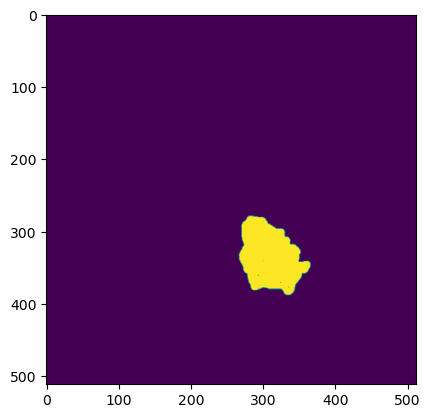

In [35]:
plt.imshow(gt[:,:,0])

In [36]:
his_df

,loss,iou_score,binary_crossentropy_plus_dice_loss,val_loss,val_iou_score,val_binary_crossentropy_plus_dice_loss
0,1.161469,0.167672,1.047524,49.840019,0.075781,49.874058
1,0.775562,0.371555,0.608694,5.276382,0.143039,5.166739
2,0.695384,0.448303,0.526503,13.590518,0.077234,13.506260
3,0.670805,0.468749,0.502707,1.340706,0.264764,1.185572
4,0.656535,0.481686,0.489323,1.106842,0.289215,0.947577
...,...,...,...,...,...,...
95,0.061783,0.949897,0.037404,0.280943,0.819871,0.198552
96,0.059643,0.951602,0.036112,0.268128,0.825434,0.191283
97,0.056337,0.954263,0.033949,0.264059,0.829745,0.186160
98,0.053475,0.956723,0.032302,0.268631,0.824978,0.190430


In [37]:
desired_value_row = his_df[his_df['val_loss'] == his_df['val_loss'].min()]
desired_value_row

,loss,iou_score,binary_crossentropy_plus_dice_loss,val_loss,val_iou_score,val_binary_crossentropy_plus_dice_loss
84,0.075209,0.939088,0.045679,0.262885,0.821588,0.184168


In [38]:
sum(his_df['val_loss'] == 0.179069)

0

In [39]:
his_df['val_loss'].min()

0.26288455724716187